In [61]:
import argparse
import os
import sys
import numpy as np

import torch
import matplotlib.pyplot as plt     # type: ignore

things_stim_path = '/user_data/mmhender/things/THINGS_smaller/'
save_stim_path = '/user_data/mmhender/stimuli/'
root = os.path.dirname(os.getcwd())

# sys.path.insert(0,root)

import utilities
import model_spatial
import optimize
import pandas as pd
import PIL

In [62]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

filename = os.path.join(things_stim_path,'things_concepts.tsv')
df = pd.read_csv(filename, sep='\t')
categ_list = np.array(df['Word'])
categ_list = [categ.replace(' ', '_') for categ in categ_list]

categ_process = list([3, 5, 40, 42])

cuda


In [63]:
categ_process

[3, 5, 40, 42]

In [64]:
n_ims_do = 2
names = []
for cc in categ_process:

    categ = categ_list[cc]
    image_folder = os.path.join(things_stim_path, 'Images',categ)
    image_filenames = os.listdir(image_folder)

    for ii in range(n_ims_do):

        target_image_filename = os.path.join(image_folder, image_filenames[ii])
        assert('.jpg' in target_image_filename)
        name = image_filenames[ii].split('.jpg')[0]
        
        names += [name]

In [65]:
names

['acorn_02n',
 'acorn_13s',
 'air_mattress_05s',
 'air_mattress_09s',
 'arugula_12s',
 'arugula_06s',
 'asparagus_12s',
 'asparagus_06s']

In [66]:
important_layers = ['relu1_1', 'pool1','pool2','pool3','pool4']    

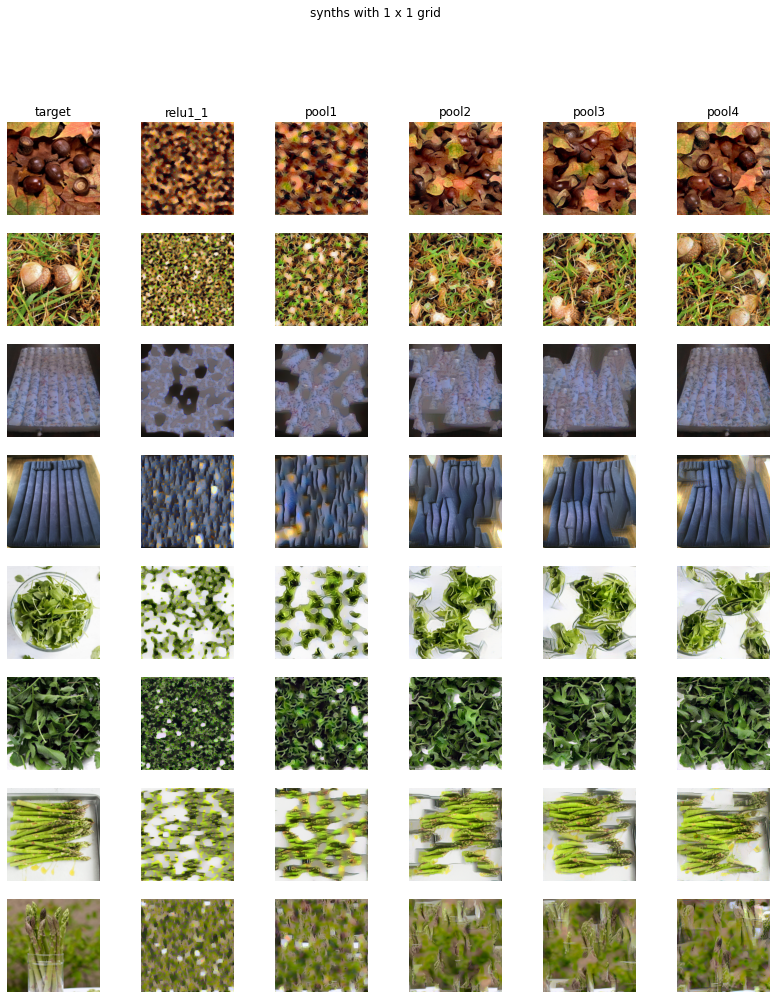

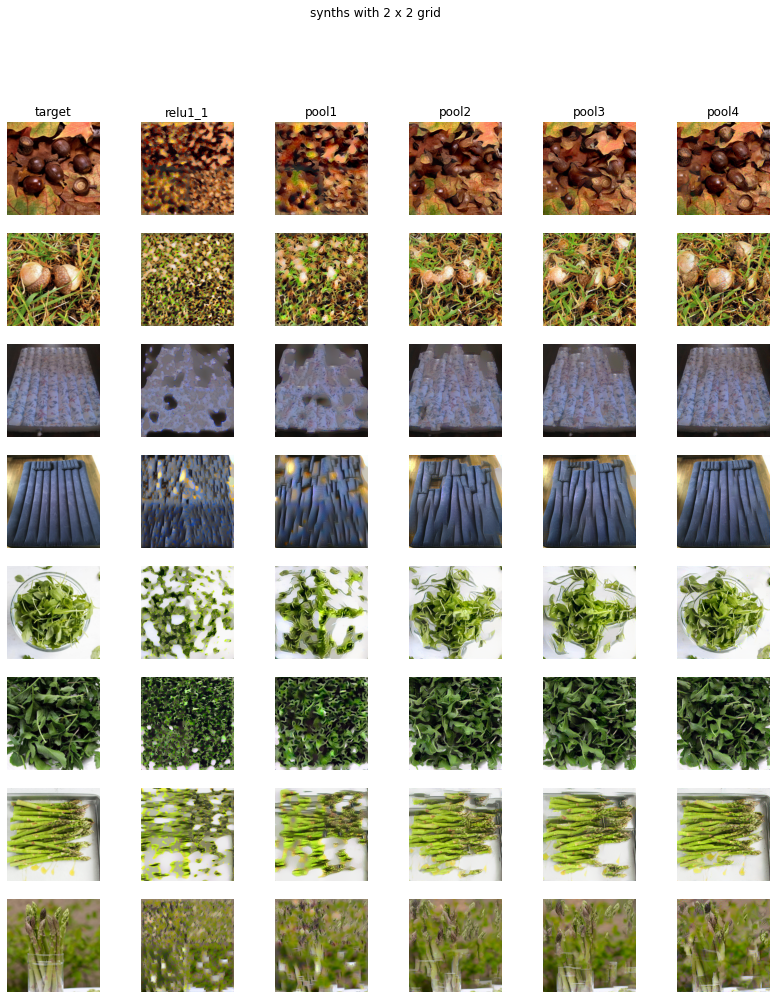

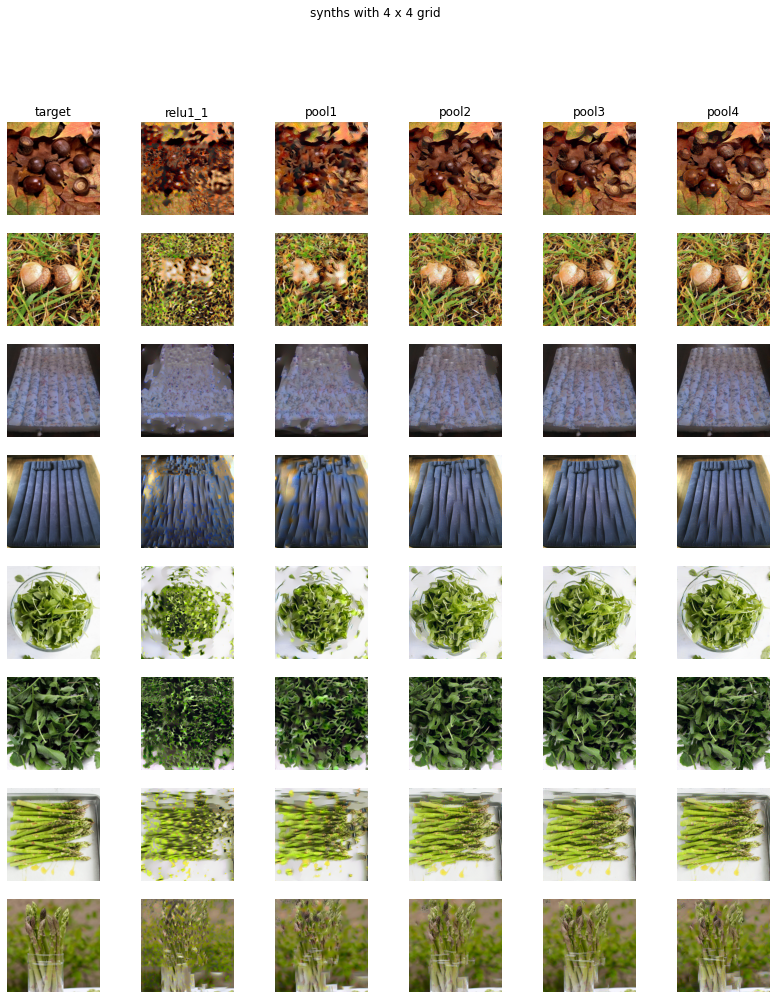

In [81]:
n_ims_plot = len(names)

for n_grid in [1,2,4]:

    plt.figure(figsize=(14,16))

    pi = 0;

    for ii, name in enumerate(names):

        folder = os.path.join(save_stim_path, 'things_synth',name)

        filename_full = os.path.join(folder, 'orig.png')
        im = PIL.Image.open(filename_full)

        pi+=1
        plt.subplot(n_ims_plot, len(important_layers)+1, pi)
        plt.imshow(im)
        plt.axis('off')
        if ii==0:
            plt.title('target')

        for ll in range(len(important_layers)):

            filename_full = os.path.join(folder, 'grid%dx%d_upto_%s.png'%\
                                         (n_grid, n_grid,important_layers[ll]))
            # print(filename_full)
            im = PIL.Image.open(filename_full)

            pi+=1
            plt.subplot(n_ims_plot, len(important_layers)+1, pi)
            plt.imshow(im)
            plt.axis('off')
            if ii==0:
                plt.title('%s'%important_layers[ll])

    plt.suptitle('synths with %d x %d grid'%(n_grid, n_grid));

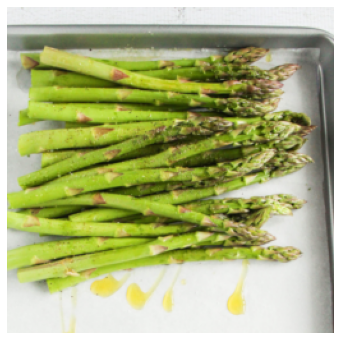

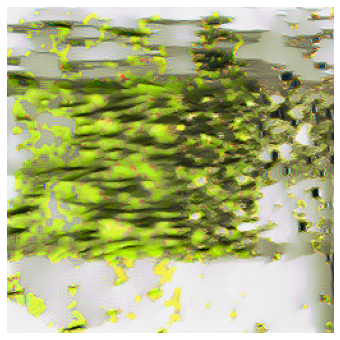

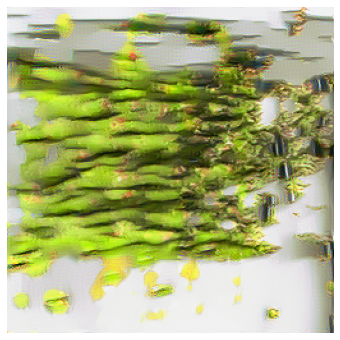

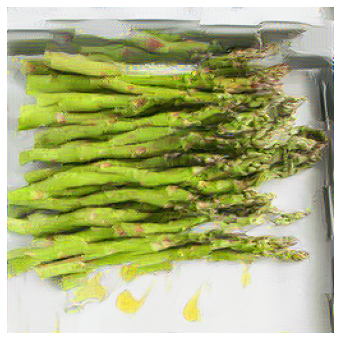

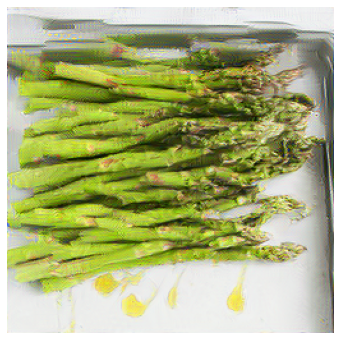

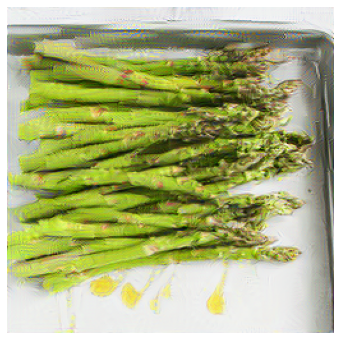

In [83]:
n_grid = 4


plt.figure(figsize=(6,6))

ii = 6;

name = names[ii]

folder = os.path.join(save_stim_path, 'things_synth',name)

filename_full = os.path.join(folder, 'orig.png')
im = PIL.Image.open(filename_full)

plt.imshow(im)
plt.axis('off')
if ii==0:
    plt.title('target')

for ll in range(len(important_layers)):

    plt.figure(figsize=(6,6))

    filename_full = os.path.join(folder, 'grid%dx%d_upto_%s.png'%\
                                 (n_grid, n_grid,important_layers[ll]))
    # print(filename_full)
    im = PIL.Image.open(filename_full)

    plt.imshow(im)
    plt.axis('off')
    if ii==0:
        plt.title('%s'%important_layers[ll])
